### load the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### EDA 
Check for missing values and basic statistics.



In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepallengthcm  150 non-null    float64
 1   sepalwidthcm   150 non-null    float64
 2   petallengthcm  150 non-null    float64
 3   petalwidthcm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [10]:
df.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df.isna().sum()

sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

#### Data Visualization


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

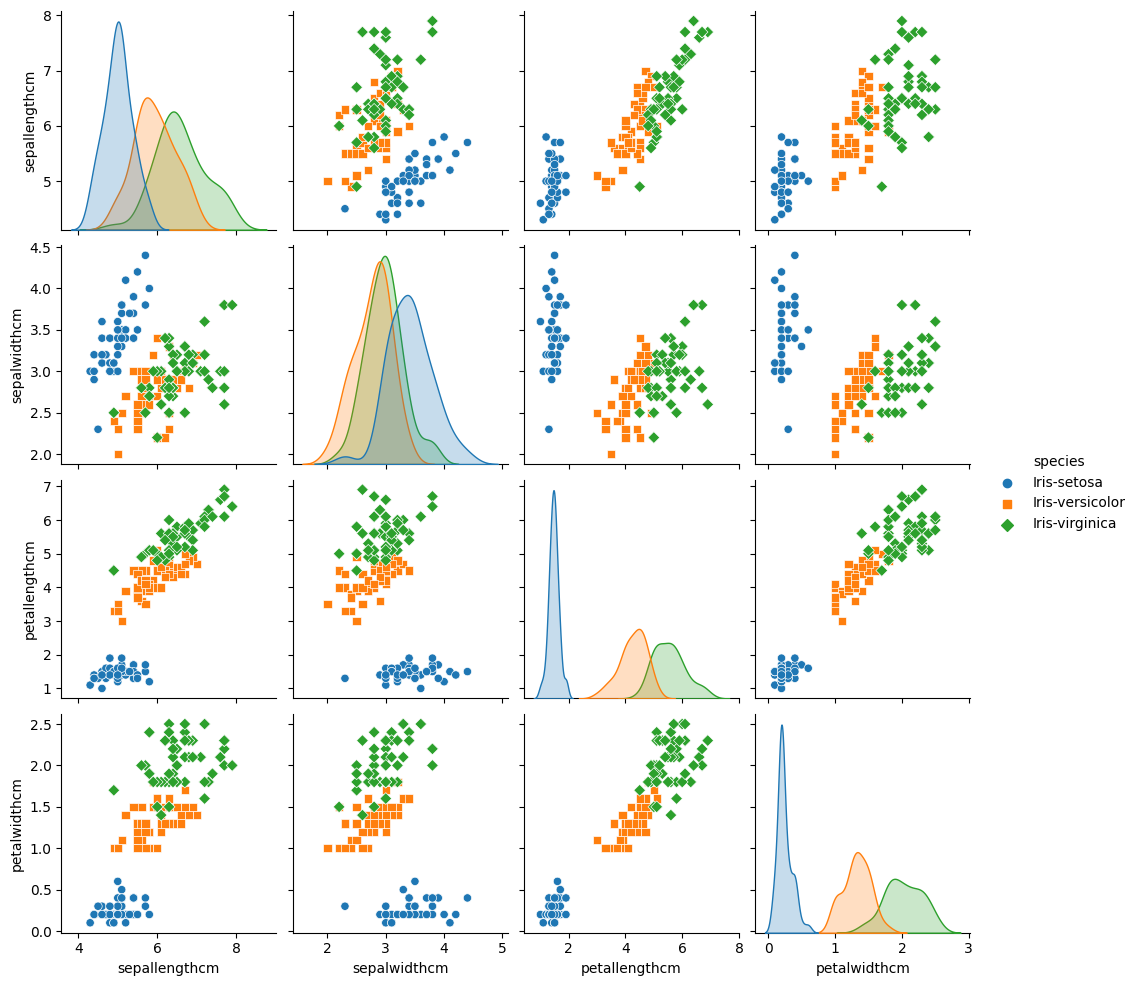

In [14]:
sns.pairplot(data=df,hue='species', diag_kind='kde', markers=["o", "s", "D"])
plt.show()

In [15]:
x = df.drop('species',axis=1)
y = df['species']

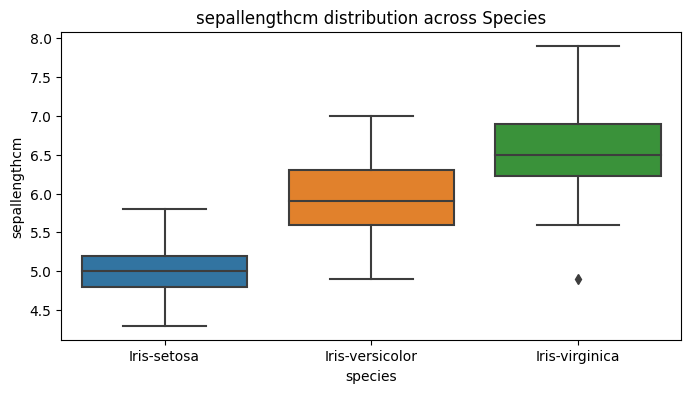

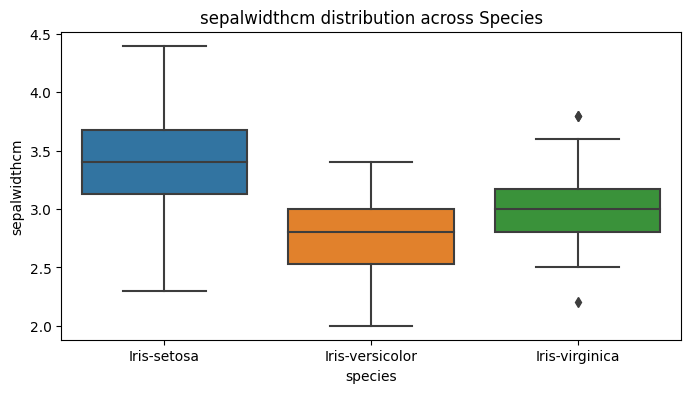

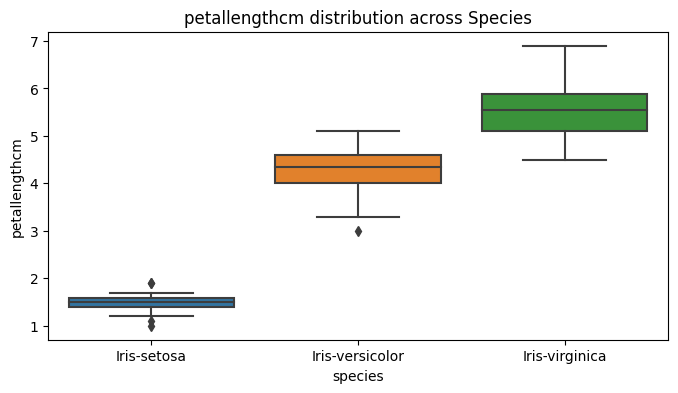

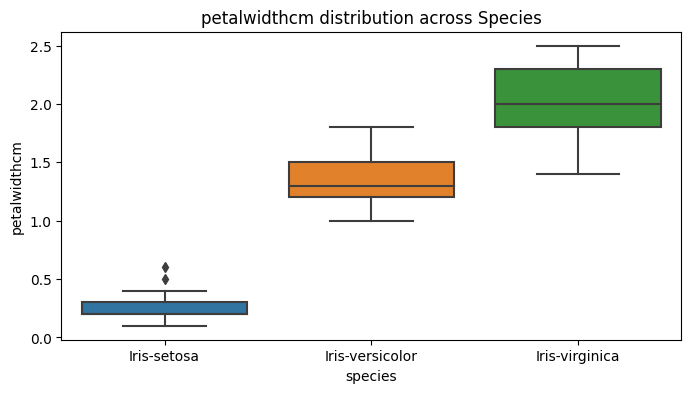

In [16]:
for col in x.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['species'],y=df[col])
    plt.title(f'{col} distribution across Species')
    plt.show()

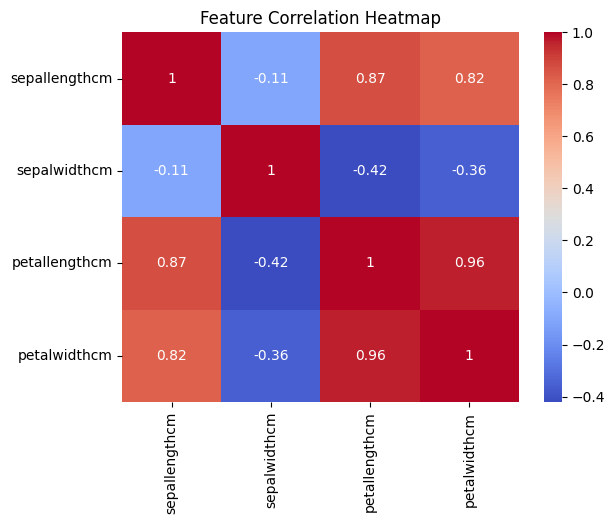

In [17]:
corr = df.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


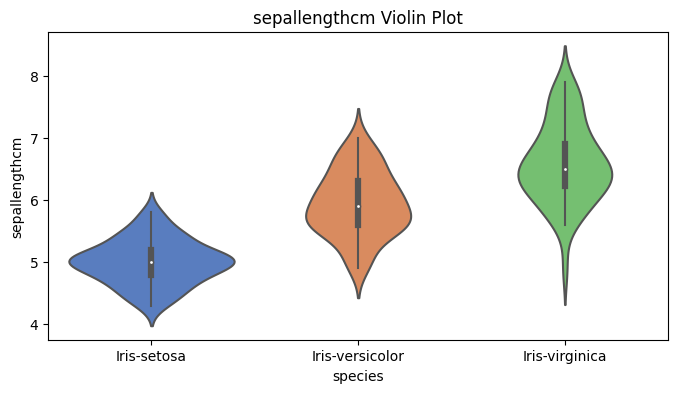

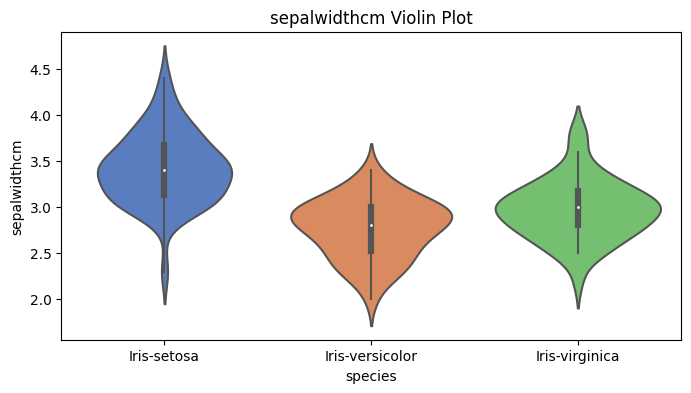

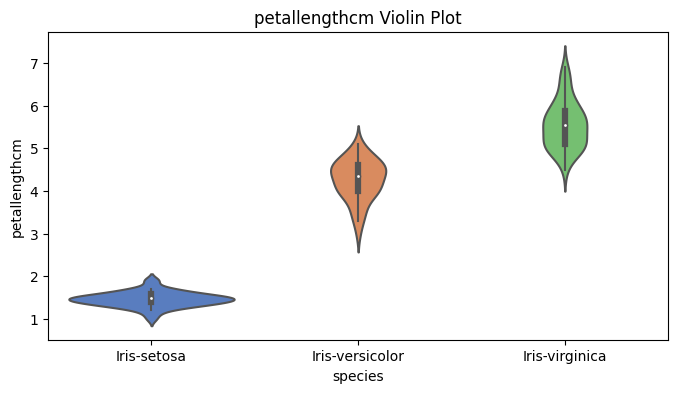

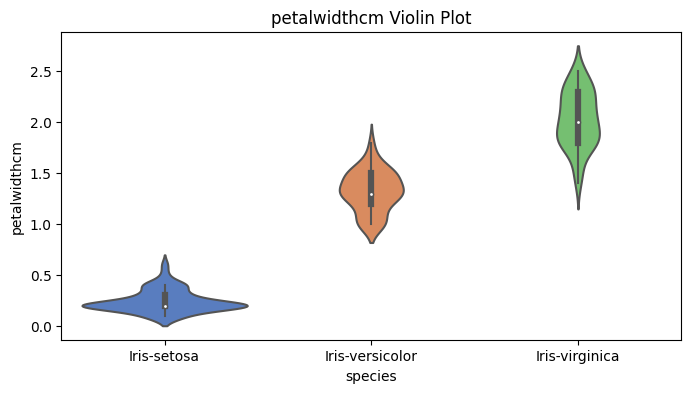

In [18]:
for column in x.columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df['species'], y=df[column], palette="muted")
    plt.title(f'{column} Violin Plot')
    plt.show()


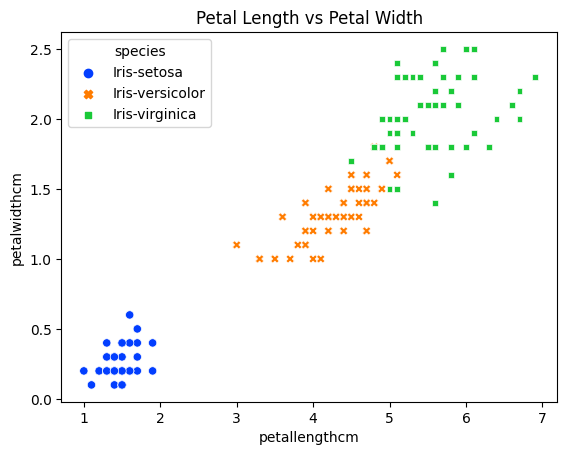

In [19]:
sns.scatterplot(data=df, x='petallengthcm', y='petalwidthcm', hue='species', style='species', palette='bright')
plt.title('Petal Length vs Petal Width')
plt.show()


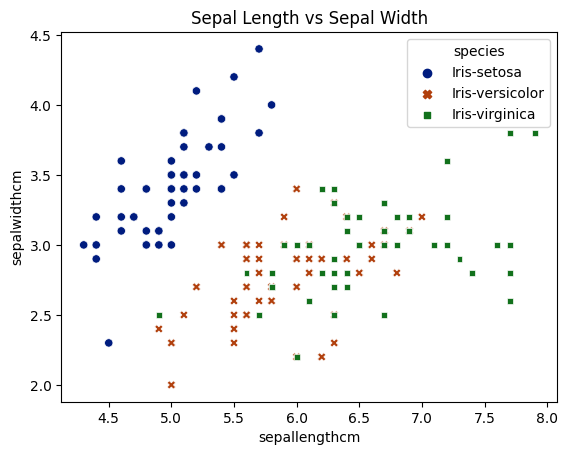

In [20]:
sns.scatterplot(data=df, x='sepallengthcm', y='sepalwidthcm', hue='species', style='species', palette='dark')
plt.title('Sepal Length vs Sepal Width')
plt.show()

The clustering of Iris Versicolor and Iris Virginica in the Sepal Length vs. Sepal Width plot is expected, as these species have overlapping characteristics in sepal dimensions.

we can proceed with pca for better fitting of the model 

In [21]:
from sklearn.decomposition import PCA

In [22]:
import numpy as np

In [23]:
pca = PCA(n_components=2)

In [24]:
x

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
df_pca = pca.fit_transform(x)

In [26]:
df_pca = pd.DataFrame(df_pca,columns=['PC1', 'PC2'])

In [27]:
df_pca

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [28]:
df_pca['species'] = df['species']

In [29]:
df_pca

,PC1,PC2,species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


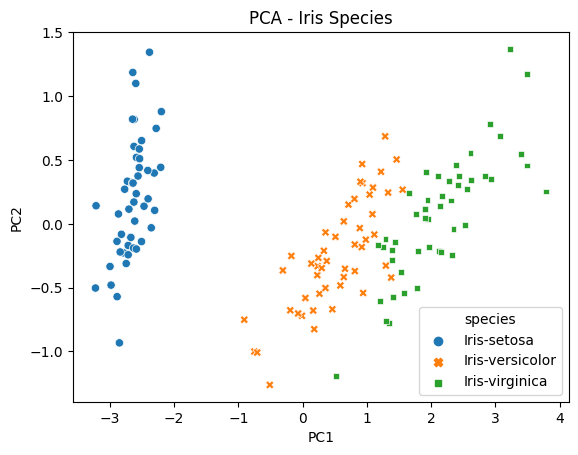

In [30]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', style='species')
plt.title('PCA - Iris Species')
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
df_pca['species'] = le.fit_transform(df_pca['species'])

In [34]:
df_pca

,PC1,PC2,species
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0
...,...,...,...
145,1.944017,0.187415,2
146,1.525664,-0.375021,2
147,1.764046,0.078519,2
148,1.901629,0.115877,2


In [35]:
from scipy import stats

In [36]:
z_score=np.abs(stats.zscore(x))

In [37]:
outliers =np.where(z_score>3)

In [38]:
outliers

(array([15]), array([1]))

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_pca

,PC1,PC2,species
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0
...,...,...,...
145,1.944017,0.187415,2
146,1.525664,-0.375021,2
147,1.764046,0.078519,2
148,1.901629,0.115877,2


In [41]:
x = df_pca.drop('species',axis=1)

In [42]:
y= df_pca['species']

In [43]:
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [46]:
len(x_train)

100

In [47]:
len(y_test)

50

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
     'C': [0.1, 1, 10, 100],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']        # Kernel coefficient

}

grid_svm = GridSearchCV(SVC(),param_grid=param_grid,scoring='accuracy', verbose=1)

grid_svm.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [49]:
# Best parameters and accuracy
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best cross-validation score for SVM:", grid_svm.best_score_)


Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM: 0.96


In [50]:
from sklearn.metrics import accuracy_score

# Evaluate on test set
y_pred_svm = grid_svm.predict(x_test)
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Test Accuracy: 0.98


DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid_tree,scoring='accuracy', verbose=1)
grid_tree.fit(x_train,y_train)



Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [52]:
# Decision Tree results
print("Best parameters for Decision Tree:", grid_tree.best_params_)
print("Best cross-validation score for Decision Tree:", grid_tree.best_score_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.96


In [53]:
from sklearn.metrics import classification_report
# Test evaluation
y_pred_tree = grid_tree.predict(x_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Test Accuracy: 0.98
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [54]:
from sklearn.metrics import classification_report
print('svm :',classification_report(y_test, y_pred_svm))
print('tree :',classification_report(y_test, y_pred_tree))


svm :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

tree :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Based on the precision, recall, and f1-score metrics, both the SVM and Decision Tree models are performing very well, with an accuracy of 98% on the test set. However, there are subtle differences:

SVM Model:
Class 1 (Versicolor): Precision is perfect (1.00), but recall is slightly lower (0.93).
Class 2 (Virginica): Perfect recall (1.00) and high precision (0.94).


Decision Tree Model:
Class 1 (Versicolor): Slightly lower precision (0.94) but perfect recall (1.00).
Class 2 (Virginica): Perfect precision (1.00) but slightly lower recall (0.94).

Key Insights:


Both models have very similar performance: The slight differences are due to the inherent characteristics of each algorithm (SVM and Decision Tree). 

Decision Trees might be better at identifying certain patterns due to their tree structure, whereas SVM might be more robust with regularization in this case.


Precision and Recall trade-offs: Both models have a good balance of precision and recall, but the specific trade-offs vary slightly for each class.

The SVM might be slightly better at minimizing false positives for class 1 (Versicolor), while the Decision Tree might do better with class 2 (Virginica).

In [55]:
# lets take svm 

y_pred_svm

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [56]:
y_pred_svm_fin = pd.Series(y_pred_svm).replace(species_mapping)


In [57]:
y_pred_svm_fin

0     Iris-versicolor
1         Iris-setosa
2      Iris-virginica
3     Iris-versicolor
4     Iris-versicolor
5         Iris-setosa
6     Iris-versicolor
7      Iris-virginica
8      Iris-virginica
9     Iris-versicolor
10     Iris-virginica
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15    Iris-versicolor
16     Iris-virginica
17    Iris-versicolor
18    Iris-versicolor
19     Iris-virginica
20        Iris-setosa
21     Iris-virginica
22        Iris-setosa
23     Iris-virginica
24     Iris-virginica
25     Iris-virginica
26     Iris-virginica
27     Iris-virginica
28        Iris-setosa
29        Iris-setosa
30        Iris-setosa
31        Iris-setosa
32    Iris-versicolor
33        Iris-setosa
34        Iris-setosa
35     Iris-virginica
36    Iris-versicolor
37        Iris-setosa
38        Iris-setosa
39        Iris-setosa
40     Iris-virginica
41    Iris-versicolor
42    Iris-versicolor
43        Iris-setosa
44        Iris-setosa
45    Iris